<a href="https://colab.research.google.com/github/OliviaG6403/Planar-Graph-Senior-Capstone-Project/blob/main/Assignment_4_Visualizer_%7C_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment 4
By: Ahmad Mikky, Nada Mikky, Olivia Gottlieb

- Shortest Path Algorithm Visualizer
-----------------------------------------------


### 1. Upload & Parse DOT File (Directed)
- By: Nada Mikky (November 10th)

In [ ]:
#1. Read the dot file (Same from last assignment, except this time we ADD the direction)

import re # Import the regular expressions module for pattern matching
from google.colab import files
import networkx as nx
import matplotlib.pyplot as plt

uploaded = files.upload()  # Pick example.dot file from computer

# Create empty data structures:
vertices = set() # To store unique vertices
edges = []       # To store edges as (source, target, weight)

# Read and parse DOT file
filename = list(uploaded.keys())[0]  # Get the uploaded filename automatically

with open(filename, 'r') as f:
    for line in f:
        # Match lines like: x_1 -> x_2 [weight=1]
        match = re.match(r'\s*(\w+)\s*->\s*(\w+)\s*\[weight=(\d+)\]', line)
        if match:
            u, v, w = match.groups()
        # --------------------------------
            # New changes to preserve direction
            vertices.add(u) # New
            vertices.add(v) # New
            edges.append((u, v, int(w)))   # direction
        # --------------------------------
            print("Vertices:")
            print(vertices)
            print("Directed edges (u \u2192 v, weight):")
            print(edges, "\n")

Saving example.dot to example.dot
Vertices:
{'x_1', 'x_2'}
Directed edges (u → v, weight):
[('x_1', 'x_2', 1)] 

Vertices:
{'x_1', 'x_2', 'x_3'}
Directed edges (u → v, weight):
[('x_1', 'x_2', 1), ('x_1', 'x_3', 2)] 

Vertices:
{'x_1', 'x_2', 'x_3'}
Directed edges (u → v, weight):
[('x_1', 'x_2', 1), ('x_1', 'x_3', 2), ('x_2', 'x_3', 1)] 

Vertices:
{'x_1', 'x_2', 'x_4', 'x_3'}
Directed edges (u → v, weight):
[('x_1', 'x_2', 1), ('x_1', 'x_3', 2), ('x_2', 'x_3', 1), ('x_3', 'x_4', 3)] 

Vertices:
{'x_1', 'x_2', 'x_4', 'x_3'}
Directed edges (u → v, weight):
[('x_1', 'x_2', 1), ('x_1', 'x_3', 2), ('x_2', 'x_3', 1), ('x_3', 'x_4', 3), ('x_4', 'x_1', 1)] 



# Planarity Check Helper Function

By: Olivia Gottlieb

In [ ]:
G = nx.DiGraph()
is_planar, embedding = nx.check_planarity(G, True)

if is_planar:
    print("Graph is planar (good!). Using planar embedding layout...")
    pos = nx.combinatorial_embedding_to_pos(embedding)
else:
    print("Graph is NOT planar. Falling back to spring layout.")
    pos = nx.spring_layout(G, seed=42)

Graph is planar (good!). Using planar embedding layout...


# Draw_Graph Function

By: Olivia Gottlieb

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

def draw_graph(G, edge_colors, title="Step"):
    try:
        pos = graphviz_layout(G, prog="dot")
    except:
        pos = nx.spring_layout(G, seed=42)

    colors = []
    for e in G.edges():
        colors.append(edge_colors.get(e, "black"))

    plt.figure(figsize=(7,5))
    nx.draw(
        G, pos, with_labels=True, edge_color=colors,
        arrows=True, node_size=800, font_weight='bold'
    )

    nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))

    plt.title(title)
    plt.show()


### 2. Build Directed Graph manually with NetworkX & Dijkstra's Algorithm
- By: Ahmad Mikky (November 17th)


In [ ]:

# 2. Build a directed graph manually with NetworkX
import networkx as nx
from IPython.display import clear_output, display

G = nx.DiGraph()
G.add_weighted_edges_from(edges)

# 3. Initialize edge colors
edge_colors = {edge: 'yellow' for edge in G.edges()}


# 4. Dijkstra’s shortest path simulation
start = list(vertices)[0]  # pick first node as starting point
dist = {v: float('inf') for v in G.nodes()}
dist[start] = 0
processed = set()
previous = {}

while len(processed) < len(G.nodes()):
    # Pick vertex with smallest tentative distance
    unprocessed_nodes = [v for v in G.nodes() if v not in processed]
    if not unprocessed_nodes:
        break
    current = min(unprocessed_nodes, key=lambda v: dist[v])

    processed.add(current)
    print(f"\nProcessing vertex: {current}")

    # Draw the graph
    # draw_graph(G, edge_colors, title=f"Selected vertex: {current}")

    input("Press Enter to continue...")

    # Traverse the nodes for edge-color assignments
    for neighbor in G.successors(current):
        edge = (current, neighbor)

        # Already finalized : RED
        if neighbor in processed:
            edge_colors[edge] = 'red'
            continue

        # Edge being processed : BLUE
        edge_colors[edge] = 'blue'

        new_dist = dist[current] + G[current][neighbor]['weight']
        if new_dist < dist[neighbor]:
            dist[neighbor] = new_dist
            previous[neighbor] = current
            # Edge part of shortest path : GREEN
            edge_colors[edge] = 'green'
        else:
            # Not improving path : stays YELLOW
            if edge_colors[edge] != 'green':
                edge_colors[edge] = 'yellow'

# Print results
print("\n Shortest path distances from start vertex:", start)
for node, d in dist.items():
    print(f"  {node}: {d}")

print("\n Edges that are part of a shortest path:")
for v, u in previous.items():
    print(f"  {u} -> {v}\n")


# Print summary once after all edges are added
print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")




Processing vertex: x_1
Press Enter to continue...

Processing vertex: x_2
Press Enter to continue...

Processing vertex: x_3
Press Enter to continue...

Processing vertex: x_4
Press Enter to continue...

 Shortest path distances from start vertex: x_1
  x_1: 0
  x_2: 1
  x_3: 2
  x_4: 5

 Edges that are part of a shortest path:
  x_1 -> x_2

  x_1 -> x_3

  x_3 -> x_4

Graph created with 4 nodes and 5 edges.


Graph is planar. Drawing planar embedding...


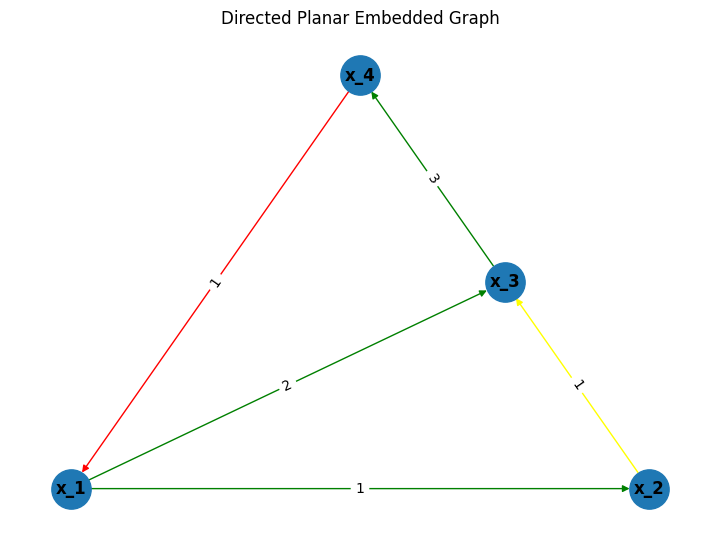

In [ ]:
# Draw the graph with colored edges (olivia)
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

# --- PLANAR EMBEDDED DRAWING ---

is_planar, embedding = nx.check_planarity(G, True)

if is_planar:
    print("Graph is planar. Drawing planar embedding...")
    pos = nx.combinatorial_embedding_to_pos(embedding)
else:
    print("Non-planar graph. Using spring layout instead.")
    pos = nx.spring_layout(G, seed=42)

colors = [edge_colors[edge] for edge in G.edges()]

plt.figure(figsize=(7,5))
nx.draw(
    G, pos, with_labels=True, edge_color=colors,
    arrows=True, node_size=800, font_weight='bold'
)

nx.draw_networkx_edge_labels(G, pos,
                             edge_labels=nx.get_edge_attributes(G, 'weight'))

plt.title("Directed Planar Embedded Graph")
plt.show()